In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 1. Loading the shopping trends dataset

df = pd.read_csv("shopping_trends.csv")

print("Dataset Preview:")
print(df.head())
print("\nDataset Information:")
print(df.info())

Dataset Preview:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discoun

In [3]:
# 2. Data Preprocessing

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [4]:
# 3. Feature Selection
# Selected features related to shopping behavior
features = [
    "Age",
    "Gender",
    "Purchase Amount (USD)",
    "Previous Purchases",
    "Review Rating",
    "Subscription Status",
    "Discount Applied",
    "Promo Code Used"
]

X = df[features]

# Target variable
# Predicting Frequency of Purchases (shopping trend)
y = df["Category"]

In [5]:
# Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Training and Testing Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# 5. Model Implementation

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [11]:
# 6. Model Evaluation

print("\nDecision Tree Performance")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

print("\nRandom Forest Performance")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

print("\nKNN Performance")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))


Decision Tree Performance
Accuracy: 0.3294871794871795
[[ 80 100  46  23]
 [105 156  56  29]
 [ 46  53  17   6]
 [ 19  25  15   4]]
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       249
           1       0.47      0.45      0.46       346
           2       0.13      0.14      0.13       122
           3       0.06      0.06      0.06        63

    accuracy                           0.33       780
   macro avg       0.24      0.24      0.24       780
weighted avg       0.33      0.33      0.33       780


Random Forest Performance
Accuracy: 0.38461538461538464
[[ 80 156  12   1]
 [104 216  21   5]
 [ 33  84   4   1]
 [ 22  39   2   0]]
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       249
           1       0.44      0.62      0.51       346
           2       0.10      0.03      0.05       122
           3       0.00      0.00      0.00        63

    accuracy              

In [ ]:
# 7. Prediction for a New Customer
sample_customer = np.array([[28, 1, 150, 8, 4.5, 1, 1, 0]])
sample_customer_scaled = scaler.transform(sample_customer)

predicted_category_encoded = rf_model.predict(sample_customer_scaled)
predicted_category = label_encoders["Category"].inverse_transform(predicted_category_encoded)

print("\nPredicted Product Category:", predicted_category[0])


Predicted Product Category: Accessories


f:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


f:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


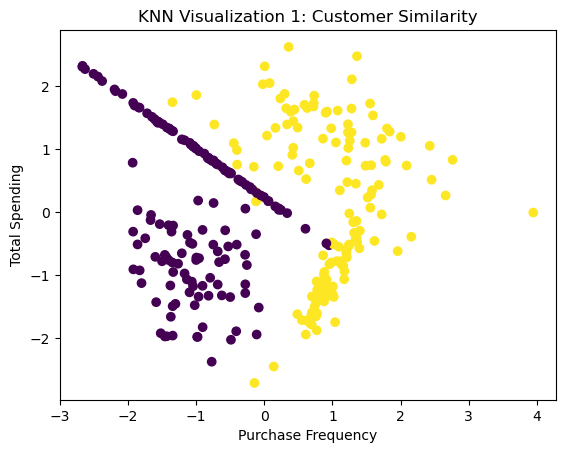

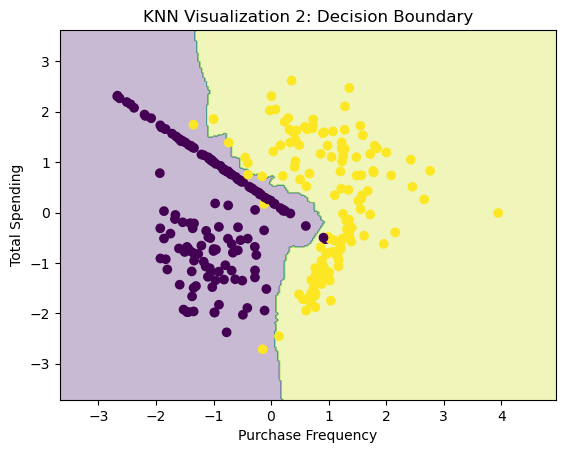

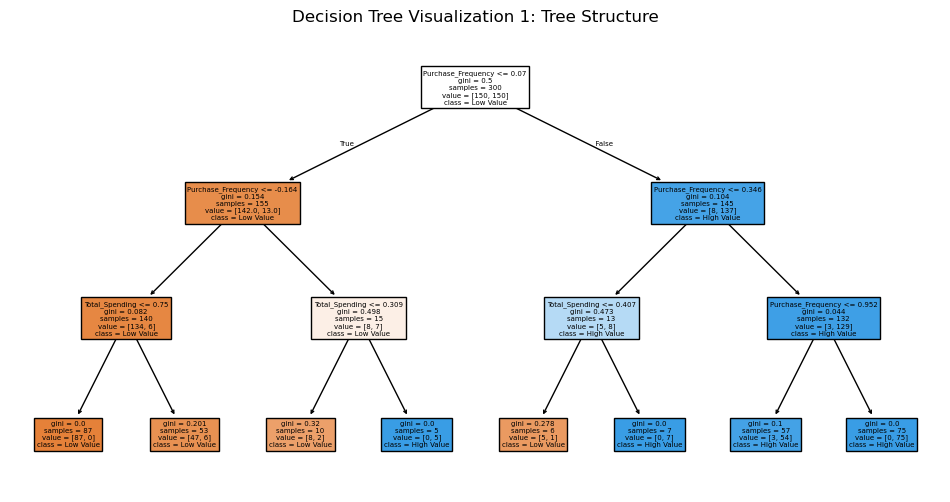

f:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


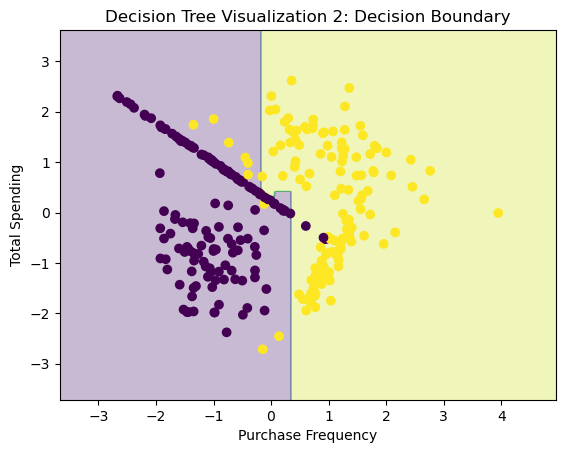

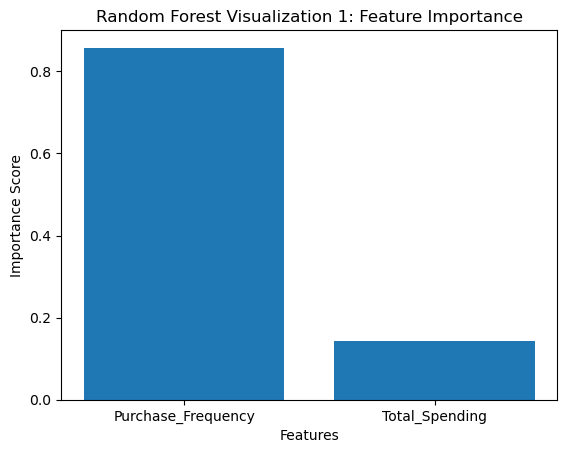

f:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


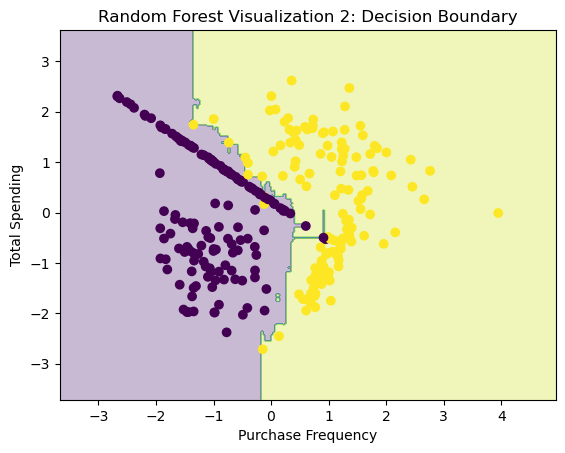

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

df = pd.DataFrame(X, columns=["Purchase_Frequency", "Total_Spending"])

# Meshgrid for decision boundaries
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)


# KNN VISUALIZATIONS

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
grid_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# KNN 1: Customer similarity
plt.figure()
plt.scatter(df["Purchase_Frequency"], df["Total_Spending"], c=y)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("KNN Visualization 1: Customer Similarity")
plt.show()

# KNN 2: Decision boundary
Z = knn.predict(grid_scaled).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df["Purchase_Frequency"], df["Total_Spending"], c=y)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("KNN Visualization 2: Decision Boundary")
plt.show()

# 
# DECISION TREE VISUALIZATIONS

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(df, y)

# Decision Tree 1: Tree structure
plt.figure(figsize=(12, 6))
plot_tree(
    dt,
    feature_names=["Purchase_Frequency", "Total_Spending"],
    class_names=["Low Value", "High Value"],
    filled=True
)
plt.title("Decision Tree Visualization 1: Tree Structure")
plt.show()

# Decision Tree 2: Decision boundary
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df["Purchase_Frequency"], df["Total_Spending"], c=y)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("Decision Tree Visualization 2: Decision Boundary")
plt.show()


# RANDOM FOREST VISUALIZATIONS

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df, y)

# Random Forest 1: Feature importance
plt.figure()
plt.bar(["Purchase_Frequency", "Total_Spending"], rf.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Visualization 1: Feature Importance")
plt.show()

# Random Forest 2: Decision boundary
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df["Purchase_Frequency"], df["Total_Spending"], c=y)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("Random Forest Visualization 2: Decision Boundary")
plt.show()
